# Performance C vs ASM

In [ ]:
#RECOMENDAMOS CORRER EN CONSOLA, TIENE MUCHO OUTPUT
!../build_performance.sh 

In [28]:
filtros = ['ColorBordes','PixeladoDiferencial','ImagenFantasma','ReforzarBrillo']
filtro = filtros[3] #FILTRO A USAR PARA ANALIZAR

In [29]:
ASM_filtro = {
    '400x300':[], '800x600':[],  '1600x1200':[], '1280x960':[], '256x128':[], '128x64':[], '1024x768':[],
}
O0_filtro = {
    '400x300':[], '800x600':[],  '1600x1200':[], '1280x960':[], '256x128':[], '128x64':[], '1024x768':[],
}
O1_filtro = {
    '400x300':[], '800x600':[],  '1600x1200':[], '1280x960':[], '256x128':[], '128x64':[], '1024x768':[],
}
O2_filtro = {
    '400x300':[], '800x600':[],  '1600x1200':[], '1280x960':[], '256x128':[], '128x64':[], '1024x768':[],
}
O3_filtro = {
    '400x300':[], '800x600':[],  '1600x1200':[], '1280x960':[], '256x128':[], '128x64':[], '1024x768':[],
}
labels = ['128x64', '256x128', '400x300', '800x600', '1024x768', '1280x960', '1600x1200']

f = open(f'../log/ASM_{filtro}.log', "r")
seguir = True
while seguir:
    for x in labels:
        l = f.readline().rstrip("\n")
        if not l:
            seguir = False
            break
        ASM_filtro[x].append(float(l.split('\t')[8]))
    
f = open(f'../log/O0_{filtro}.log', "r")
seguir = True
while seguir:
    for x in labels:
        l = f.readline().rstrip("\n")
        if not l:
            seguir = False
            break
        O0_filtro[x].append(float(l.split('\t')[8]))
    
f = open(f'../log/O1_{filtro}.log', "r")
seguir = True
while seguir:
    for x in labels:
        l = f.readline().rstrip("\n")
        if not l:
            seguir = False
            break
        O1_filtro[x].append(float(l.split('\t')[8]))
    
f = open(f'../log/O2_{filtro}.log', "r")
seguir = True
while seguir:
    for x in labels:
        l = f.readline().rstrip("\n")
        if not l:
            seguir = False
            break
        O2_filtro[x].append(float(l.split('\t')[8]))
    
f = open(f'../log/O3_{filtro}.log', "r")
seguir = True
while seguir:
    for x in labels:
        l = f.readline().rstrip("\n")
        if not l:
            seguir = False
            break
        O3_filtro[x].append(float(l.split('\t')[8]))
    



In [30]:
import numpy as np
o0 = []
o1 = []
o2 = []
o3 = []
asm = [] 
o0err = []
o1err = []
o2err = []
o3err = []
asmerr = []
for x in labels:
    o0err.append(2*np.std(O0_filtro[x]))
    o1err.append(2*np.std(O0_filtro[x]))
    o2err.append(2*np.std(O0_filtro[x]))
    o3err.append(2*np.std(O0_filtro[x]))
    asmerr.append(2*np.std(ASM_filtro[x]))
    o0.append(np.mean(O0_filtro[x]))
    o1.append(np.mean(O1_filtro[x]))
    o2.append(np.mean(O2_filtro[x]))
    o3.append(np.mean(O3_filtro[x]))
    asm.append(np.mean(ASM_filtro[x])) 

### Graficamos

In [31]:
import matplotlib.pyplot as plt
from functools import reduce 
plt.rcParams['figure.figsize'] = [18, 8]

[29811.74260714286, 101244.14317857144, 373063.44078571413, 1542897.232142857, 2609349.7321428573, 4051128.6875, 6345875.714285715]


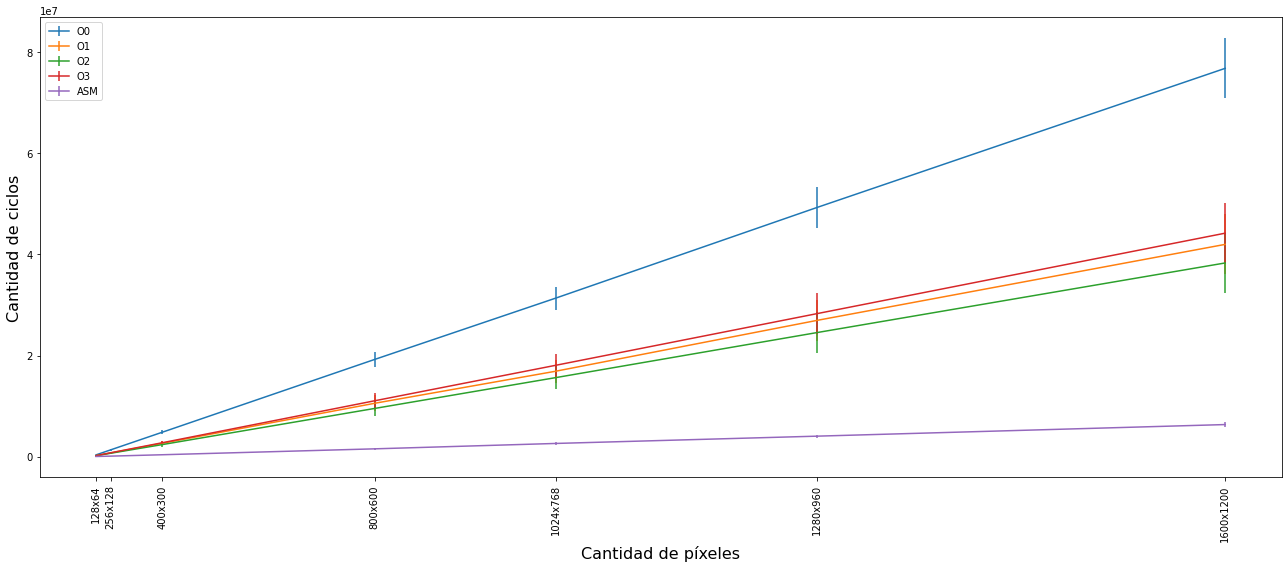

In [32]:
labelsSizes = [reduce(lambda x,y : x*y, map(int,label.split('x'))) for label in labels]
print(asm)
plt.errorbar(labelsSizes, o0, yerr=o0err, label='O0')
plt.errorbar(labelsSizes, o1, yerr=o1err, label='O1')
plt.errorbar(labelsSizes, o2, yerr=o2err, label='O2')
plt.errorbar(labelsSizes, o3, yerr=o3err, label='O3')
plt.errorbar(labelsSizes, asm, yerr=asmerr, label='ASM')
plt.xticks(labelsSizes, labels, rotation=90, fontsize=10)
plt.legend(loc="upper left")
plt.xlabel('Cantidad de píxeles', fontsize=16)
plt.ylabel('Cantidad de ciclos', fontsize=16)
plt.tight_layout()
plt.show()